Calculating $\pi$ using Monte-Carlo Simulation
-------
One of the solutions to the problem statement $\textbf{4.24}$ in $\textbf{10th}$ edition of Operating System Concepts by ABRAHAM SILBERSCHATZ, PETER BAER GALVIN, GREG GAGNE using Python

Inspiration for the code is taken from Andew Dotson's YouTube video for calculating $\pi$ i.e $\textit{How to Estimate Pi Numerically in Python}$(https://www.youtube.com/watch?v=JjfrNc-G-zA&ab_channel=AndrewDotson)

Prerequisites / Import statements
--------
------------

In [2]:
import numpy as np
from numpy import random
import threading
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import time

Non-Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$
--------

Computation time = 12.917073000000556ms
Pi we estimated : 3.1268
Actual Pi : 3.141592653589793


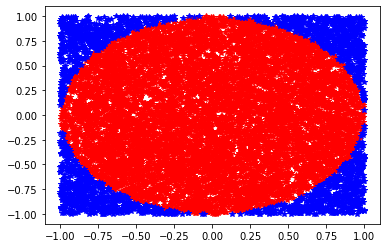

In [22]:
'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and 
square or just the square. Then uses these to calculate the pi value
 '''
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
circle_points = 0
tic = time.process_time()
for j in range(n_points) :
  x = random.uniform(-1,1)
  y = random.uniform(-1,1)
  temp = x**2 + y**2
  if(temp<=1) :
    circle_points = circle_points + 1
    circlex.append(x)
    circley.append(y)
  else :
    rectx.append(x)
    recty.append(y)
    
toc = time.process_time()
print("Computation time = "+str(1000*(toc - tic ))+"ms")
print("Pi we estimated : " + str(4*(circle_points/n_points)))
print("Actual Pi : " + str(np.pi))

 # Plot
plt.plot(circlex,circley,'r*')
plt.plot(rectx,recty,'b*')

Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$
--------
Using a **single parent thread** that invokes a **child thread,** which simulates the points and updates a global variable to be used by the parent thread to calculate $\pi$

Computation time of child_thread = 6.5481539999989735ms
Pi we estimated : 3.1472
Computation time of parent_thread = 13.483673000001417ms
Actual Pi : 3.141592653589793


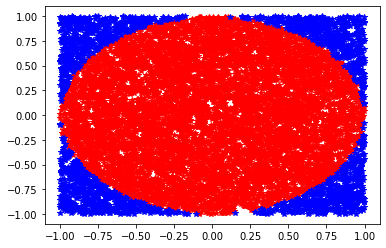

In [23]:
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
our_pi = 0
circle_points = 0

'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and square or just the square
 '''
def get_points(n_points):
  global circle_points
  for i in range(n_points) :
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    temp = x**2 + y**2
    if(temp<=1) :
      circle_points = circle_points + 1
      circlex.append(x)
      circley.append(y)
    else :
      rectx.append(x)
      recty.append(y)
 
'''
This function creates a child thread for the thread that called this function and that child thread 
would call the get_points() functions, till then the parent thread waits for the child thread and then
calculates the value of pi using Monte - Carlo Method i.e the simulated random points that lie inside
the circle
'''
def get_pi(n_points):
  child_thread = threading.Thread(target=get_points,args=(n_points,))
  child_thread.start()
  tic = time.process_time()
  child_thread.join()
  toc = time.process_time()
  print("Computation time of child_thread = "+str(1000*(toc - tic ))+"ms")
  our_pi = 4*(circle_points/n_points)
  print("Pi we estimated : " + str(our_pi))

parent_thread = threading.Thread(target=get_pi,args=(n_points,))
parent_thread.start()
tic = time.process_time()
parent_thread.join()
toc = time.process_time()
print("Computation time of parent_thread = "+str(1000*(toc - tic ))+"ms")
print("Actual Pi : " + str(np.pi))

# Plot
plt.plot(circlex,circley,'r*')
plt.plot(rectx,recty,'b*')